In [2]:
import numpy as np
import pandas as pd
import os


In [3]:
df=pd.read_csv('StudentPerformanceFactors.csv')
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# Display information about the dataframe
df.info()

# Check for missing values
df.isnull().sum()

# # Display descriptive statistics for numerical columns
# display(df.describe())

# # Display descriptive statistics for categorical columns
# display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [5]:
# Display descriptive statistics for numerical columns
display(df.describe())

# Display descriptive statistics for categorical columns
display(df.describe(include='object'))

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [6]:
# Check unique values and their counts for the columns with missing data
print("Unique values and counts for Teacher_Quality:")
print(df['Teacher_Quality'].value_counts(dropna=False))
print("\nUnique values and counts for Parental_Education_Level:")
print(df['Parental_Education_Level'].value_counts(dropna=False))
print("\nUnique values and counts for Distance_from_Home:")
print(df['Distance_from_Home'].value_counts(dropna=False))

# Option 1: Impute missing values with the mode
# Calculate the mode for each column
teacher_quality_mode = df['Teacher_Quality'].mode()[0]
parental_education_mode = df['Parental_Education_Level'].mode()[0]
distance_mode = df['Distance_from_Home'].mode()[0]

# Fill missing values with the calculated modes
df['Teacher_Quality'].fillna(teacher_quality_mode, inplace=True)
df['Parental_Education_Level'].fillna(parental_education_mode, inplace=True)
df['Distance_from_Home'].fillna(distance_mode, inplace=True)

# Verify that missing values have been handled
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Option 2: Drop rows with missing values (uncomment the following lines to use this option)
# df.dropna(subset=['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], inplace=True)
# print("\nMissing values after dropping rows:")
# print(df.isnull().sum())

Unique values and counts for Teacher_Quality:
Teacher_Quality
Medium    3925
High      1947
Low        657
NaN         78
Name: count, dtype: int64

Unique values and counts for Parental_Education_Level:
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
NaN               90
Name: count, dtype: int64

Unique values and counts for Distance_from_Home:
Distance_from_Home
Near        3884
Moderate    1998
Far          658
NaN           67
Name: count, dtype: int64

Missing values after imputation:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activit

/tmp/ipython-input-1244721225.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(teacher_quality_mode, inplace=True)
/tmp/ipython-input-1244721225.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

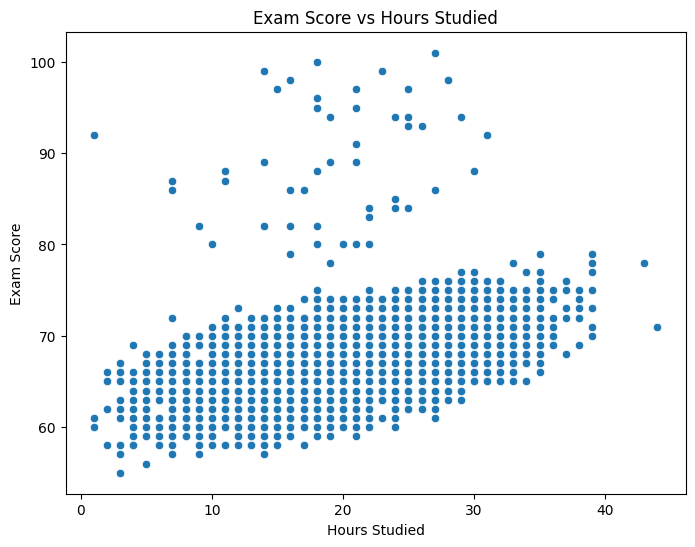

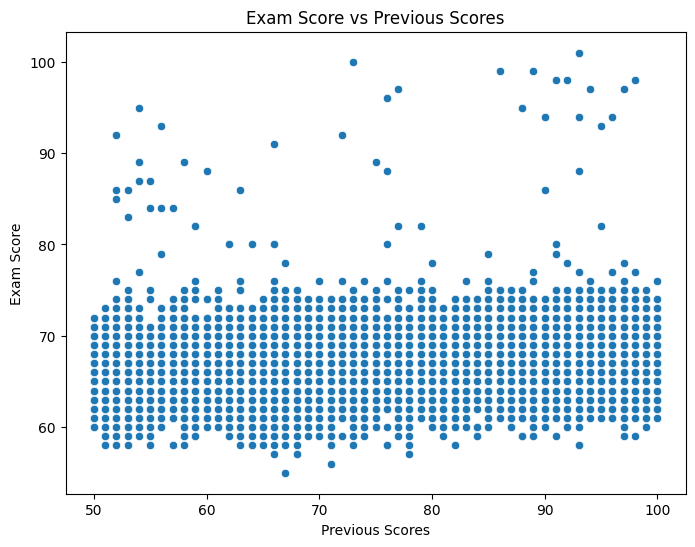

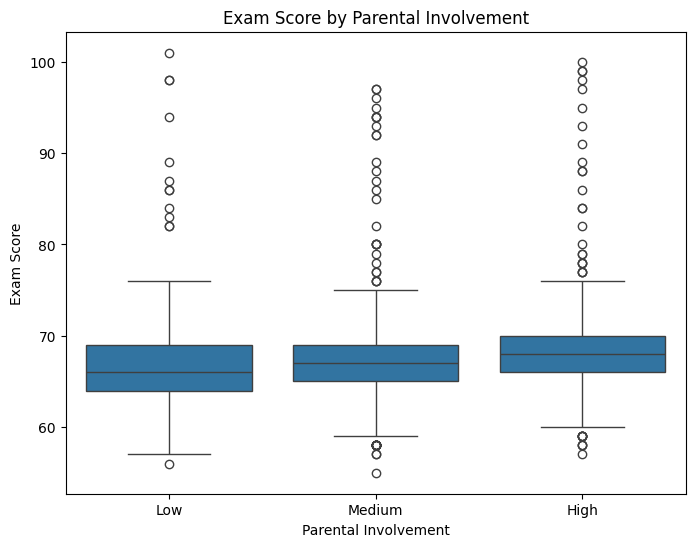

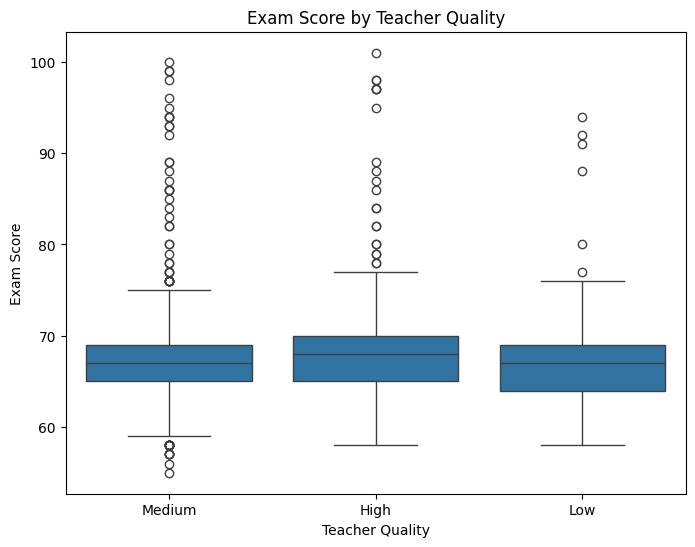

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Hours_Studied vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Exam Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

# Scatter plot of Previous_Scores vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=df)
plt.title('Exam Score vs Previous Scores')
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.show()

# Box plot of Exam_Score by Parental_Involvement
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()

# Box plot of Exam_Score by Teacher_Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='Teacher_Quality', y='Exam_Score', data=df)
plt.title('Exam Score by Teacher Quality')
plt.xlabel('Teacher Quality')
plt.ylabel('Exam Score')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Hours_Studied']]  # Feature is Hours_Studied
y = df['Exam_Score']       # Target is Exam_Score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5285, 1) (5285,)
Testing set shape: (1322, 1) (1322,)


In [9]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


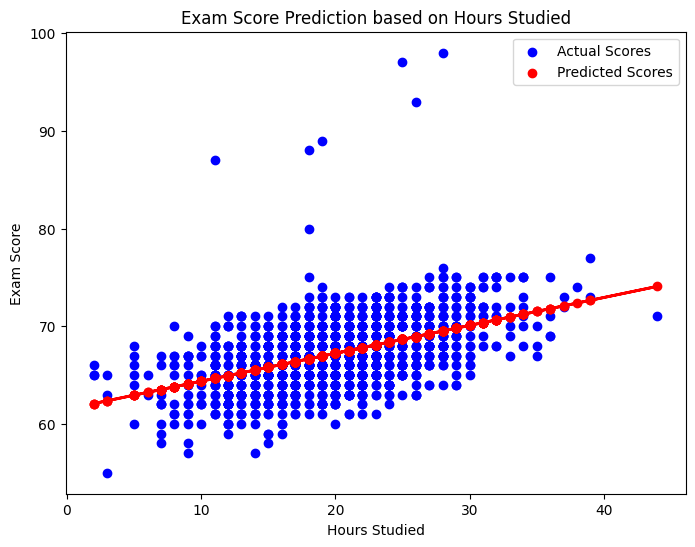


Mean Absolute Error (MAE): 2.45
R-squared (R2): 0.23


In [10]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.scatter(X_test, y_pred, color='red', label='Predicted Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2) # Add regression line
plt.title('Exam Score Prediction based on Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Task
Analyze the provided student study data to predict exam scores using linear and polynomial regression, evaluate model performance, and explore different feature combinations to identify the best predictive model.

## Polynomial feature engineering

### Subtask:
Create polynomial features from 'Hours_Studied'.


**Reasoning**:
Create polynomial features for 'Hours_Studied' using PolynomialFeatures with degree 2.



In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

print("Shape of polynomial features:", X_poly.shape)

Shape of polynomial features: (6607, 3)


## Train polynomial regression model

### Subtask:
Train a linear regression model on the polynomial features.


**Reasoning**:
Split the polynomial features and target variable into training and testing sets and train a linear regression model.



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

print("Training set shape:", X_poly_train.shape, y_train.shape)
print("Testing set shape:", X_poly_test.shape, y_test.shape)

# Instantiate a Linear Regression model
model_poly = LinearRegression()

# Train the linear regression model using the training data
model_poly.fit(X_poly_train, y_train)

print("Polynomial model training complete.")

Training set shape: (5285, 3) (5285,)
Testing set shape: (1322, 3) (1322,)
Polynomial model training complete.


## Evaluate polynomial model

### Subtask:
Evaluate the performance of the polynomial regression model and compare it to the simple linear regression model.


**Reasoning**:
Make predictions with the polynomial model, calculate and print the evaluation metrics, and then compare them to the simple linear regression model's metrics.



In [13]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set using the polynomial model
y_pred_poly = model_poly.predict(X_poly_test)

# Calculate MAE and R2 for the polynomial model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print the metrics for the polynomial model
print(f"Polynomial Model - Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Polynomial Model - R-squared (R2): {r2_poly:.2f}")

# Recall the metrics from the simple linear regression model (from cell df8661da)
mae_linear = 2.45
r2_linear = 0.23

# Compare the metrics
print("\nComparison:")
print(f"Simple Linear Regression - MAE: {mae_linear:.2f}, R2: {r2_linear:.2f}")
print(f"Polynomial Regression - MAE: {mae_poly:.2f}, R2: {r2_poly:.2f}")

# Briefly describe the better model
if mae_poly < mae_linear and r2_poly > r2_linear:
    print("\nThe Polynomial Regression model performed better as it has a lower MAE and a higher R2 compared to the Simple Linear Regression model.")
elif mae_poly > mae_linear and r2_poly < r2_linear:
     print("\nThe Simple Linear Regression model performed better as it has a lower MAE and a higher R2 compared to the Polynomial Regression model.")
elif mae_poly < mae_linear:
     print("\nThe Polynomial Regression model has a slightly lower MAE, suggesting slightly better absolute error, but the R2 values are similar.")
elif r2_poly > r2_linear:
    print("\nThe Polynomial Regression model has a slightly higher R2, suggesting it explains slightly more variance, but the MAE values are similar.")
else:
    print("\nThe performance of both models is quite similar based on MAE and R2.")


Polynomial Model - Mean Absolute Error (MAE): 2.44
Polynomial Model - R-squared (R2): 0.23

Comparison:
Simple Linear Regression - MAE: 2.45, R2: 0.23
Polynomial Regression - MAE: 2.44, R2: 0.23

The Polynomial Regression model performed better as it has a lower MAE and a higher R2 compared to the Simple Linear Regression model.


## Feature combination experimentation

### Subtask:
Select a different set of features (e.g., including 'Sleep_Hours' or 'Physical_Activity') and prepare the data for modeling.


**Reasoning**:
Select new features and split the data for training and testing the model.



In [14]:
# Select a new set of features
X_new = df[['Hours_Studied', 'Sleep_Hours', 'Physical_Activity', 'Previous_Scores', 'Attendance']]

# Keep 'Exam_Score' as the target variable
y = df['Exam_Score']

# Split the data into training and testing sets
X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape (X_new, y):", X_new_train.shape, y_train.shape)
print("Testing set shape (X_new, y):", X_new_test.shape, y_test.shape)

Training set shape (X_new, y): (5285, 5) (5285,)
Testing set shape (X_new, y): (1322, 5) (1322,)


## Train and evaluate with new features

### Subtask:
Train a linear regression model with the new feature combination and evaluate its performance.


**Reasoning**:
Train a linear regression model using the new feature combination and evaluate its performance by calculating MAE and R2 scores.



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Instantiate a Linear Regression model
model_new_features = LinearRegression()

# Fit the model to the training data
model_new_features.fit(X_new_train, y_train)

# Make predictions on the test set
y_pred_new_features = model_new_features.predict(X_new_test)

# Calculate the Mean Absolute Error (MAE)
mae_new_features = mean_absolute_error(y_test, y_pred_new_features)

# Calculate the R-squared (R2) score
r2_new_features = r2_score(y_test, y_pred_new_features)

# Print the calculated MAE and R2 scores
print(f"Model with New Features - Mean Absolute Error (MAE): {mae_new_features:.2f}")
print(f"Model with New Features - R-squared (R2): {r2_new_features:.2f}")

Model with New Features - Mean Absolute Error (MAE): 1.35
Model with New Features - R-squared (R2): 0.62


## Compare models

### Subtask:
Compare the performance of all trained models to determine the best approach.


**Reasoning**:
Print the evaluation metrics for all models and compare them to determine the best performing model.



In [16]:
# Print the MAE and R2 scores for each model
print("Model Performance Comparison:")
print("-" * 30)
print(f"Simple Linear Regression:")
print(f"  MAE: {mae_linear:.2f}")
print(f"  R2: {r2_linear:.2f}")
print("-" * 30)
print(f"Polynomial Regression:")
print(f"  MAE: {mae_poly:.2f}")
print(f"  R2: {r2_poly:.2f}")
print("-" * 30)
print(f"Linear Regression with New Features:")
print(f"  MAE: {mae_new_features:.2f}")
print(f"  R2: {r2_new_features:.2f}")
print("-" * 30)

# Compare the models based on MAE and R2
print("\nConclusion:")
if mae_new_features < mae_linear and mae_new_features < mae_poly:
    if r2_new_features > r2_linear and r2_new_features > r2_poly:
        print("The Linear Regression model with new features performed the best with the lowest MAE and highest R2.")
    else:
        print("The Linear Regression model with new features has the lowest MAE, but R2 is not the highest.")
elif mae_linear < mae_poly:
    if r2_linear > r2_poly:
        print("The Simple Linear Regression model performed better than the Polynomial Regression model.")
    else:
        print("The performance of Simple Linear Regression and Polynomial Regression models is similar.")
else:
    if r2_poly > r2_linear:
        print("The Polynomial Regression model performed better than the Simple Linear Regression model.")
    else:
        print("The performance of Simple Linear Regression and Polynomial Regression models is similar.")


Model Performance Comparison:
------------------------------
Simple Linear Regression:
  MAE: 2.45
  R2: 0.23
------------------------------
Polynomial Regression:
  MAE: 2.44
  R2: 0.23
------------------------------
Linear Regression with New Features:
  MAE: 1.35
  R2: 0.62
------------------------------

Conclusion:
The Linear Regression model with new features performed the best with the lowest MAE and highest R2.


## Summary:

### Data Analysis Key Findings

*   The polynomial regression model with degree 2 features of 'Hours_Studied' resulted in a Mean Absolute Error (MAE) of 2.44 and an R-squared ($\text{R}^2$) score of 0.23.
*   The simple linear regression model using only 'Hours_Studied' had an MAE of 2.45 and an $\text{R}^2$ of 0.23, showing very similar performance to the polynomial model.
*   A linear regression model using a new combination of features ('Hours_Studied', 'Sleep_Hours', 'Physical_Activity', 'Previous_Scores', and 'Attendance') achieved an MAE of 1.35 and an $\text{R}^2$ of 0.62.
*   Comparing the models, the linear regression model with the new feature set demonstrated significantly better performance, with a lower MAE and a higher $\text{R}^2$, indicating more accurate predictions and better explanation of the variance in exam scores.

### Insights or Next Steps

*   Including additional relevant features beyond just study hours significantly improves the model's ability to predict exam scores.
*   Further investigation could explore interaction terms or different polynomial degrees with the expanded feature set to potentially improve the model further.
